## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import joblib
import warnings

In [4]:
#Loading the dataset
df = pd.read_csv('nootbook/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.drop('id', axis=1, inplace=True)

## Data Preprocessing

In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
#Checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
## These are the features with nan values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

bmi 3.93346 % missing values


In [10]:
# Handle missing values
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\bibha\AppData\Local\Temp\ipykernel_2976\1186068294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [11]:
#Checking for null values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
## ever married
print(df['ever_married'].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


In [13]:
## work type
print(df['work_type'].value_counts())

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [14]:
## gender
print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [15]:
## Residence
print(df['Residence_type'].value_counts())

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


In [16]:
## smoking status
print(df['smoking_status'].value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [17]:
## get all the newmeric Features
num_features=[feature for feature in df.columns if df[feature].dtype !='O']
print('Num of numerical Features:',len(num_features))

Num of numerical Features: 6


In [18]:
## Categorical Features
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of Categorical Features:',len(cat_features))

Num of Categorical Features: 5


In [19]:
## Discreate Features
discrete_features=[feature for feature in df.columns if len(df[feature].unique())<=25]
print('Num of Discreate Features:',len(discrete_features))

Num of Discreate Features: 8


In [20]:
## Continuous Features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of continuous Features:',len(continuous_features))

Num of continuous Features: 3


In [21]:
# Encode categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [22]:
# Handling class imbalance
X = df.drop('stroke', axis=1)
y = df['stroke']

In [23]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Train SVM Model with balanced class weights
svc = SVC(kernel='rbf', class_weight='balanced')
svc.fit(X_train, y_train)

SVC(class_weight='balanced')

In [27]:
# Make Predictions
y_pred = svc.predict(X_test)

In [28]:
# Evaluate Model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1220
           1       0.84      0.88      0.86      1211

    accuracy                           0.85      2431
   macro avg       0.86      0.85      0.85      2431
weighted avg       0.86      0.85      0.85      2431

[[1013  207]
 [ 147 1064]]


In [29]:
from sklearn.model_selection import GridSearchCV
## defining parameter range
param_grid={'C':[0.1,1,0.01,0.001,0.0001],
           'gamma':[1,0.01,0.001,0.0001],
           'kernel':['rbf']}

In [30]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.825 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   1.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.838 total time=   1.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.862 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.817 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.813 total time=   0.9s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.805 total time=   1.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.823 total time=   0.9s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.775 total time=   1.5s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 0.01, 0.001, 0.0001],
                         'gamma': [1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [32]:
## Prediction
y_pred3=grid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1220
           1       0.89      0.93      0.91      1211

    accuracy                           0.90      2431
   macro avg       0.91      0.91      0.90      2431
weighted avg       0.91      0.90      0.90      2431

[[1079  141]
 [  90 1121]]


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [40]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)## train model
    
    ##Make Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    ## Training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    ## Test Set Performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print('model Performence for Training set')
    print("- Accuracy: {:.4}".format(model_train_accuracy))
    print("- F1 score: {:.4}".format(model_train_f1))
    
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print('-------------------------------------------------')

    print('model Performence for Test set')
    print("- Accuracy: {:.4}".format(model_test_accuracy))
    print("- F1 score: {:.4}".format(model_test_f1))
    
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
    
    print("="*35)
    print('\n')

Logistic Regression
model Performence for Training set
- Accuracy: 0.8106
- F1 score: 0.8105
- Precision: 0.7974
- Recall: 0.8334
- Roc Auc Score: 0.8106
-------------------------------------------------
model Performence for Test set
- Accuracy: 0.8153
- F1 score: 0.8152
- Precision: 0.7986
- Recall: 0.8415
- Roc Auc Score: 0.8154


Decision Tree
model Performence for Training set
- Accuracy: 1.0
- F1 score: 1.0
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------
model Performence for Test set
- Accuracy: 0.9009
- F1 score: 0.9008
- Precision: 0.8868
- Recall: 0.9182
- Roc Auc Score: 0.9009


Random Forest
model Performence for Training set
- Accuracy: 1.0
- F1 score: 1.0
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------
model Performence for Test set
- Accuracy: 0.9449
- F1 score: 0.9449
- Precision: 0.9291
- Recall: 0.9628
- Roc Auc Score: 0.9449


Adaboost
model P

In [41]:
model=list(models.values())[1]
model.fit(X_train,y_train)

DecisionTreeClassifier()

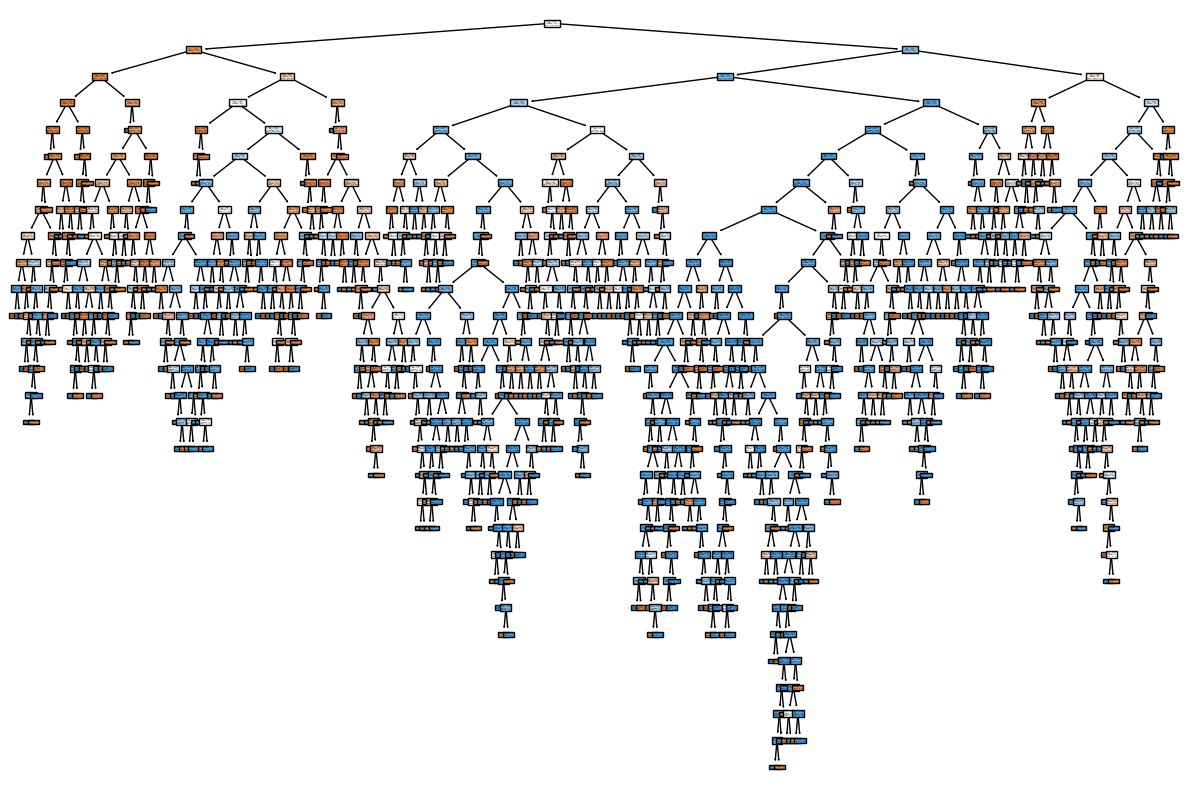

In [42]:
## Visual the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [43]:
## Hyperparameter Training
rf_params={"max_depth":[5,8,15,None,10],
          "max_features":[5,7,"auto",8],
          "min_samples_split":[2,8,15,20],
          "n_estimators":[100,200,500,1000]}
dt_params={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
xgboost_params={"learning_rate":[0.1,0.01],
               "max_depth":[5,8,12,20,30],
               "n_estimators":[100,200,300],
               "colsample_bytree":[0.5,0.8,1,0.3,0.4]
}

In [44]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [45]:
dt_params

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [46]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

In [47]:
## Models List for Hyperparameter tuning
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
    ("DT",DecisionTreeClassifier(),dt_params),
    ("Xgboost",XGBClassifier(),xgboost_params)
]

In [48]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('DT',
  DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy', 'log_loss'],
   'splitter': ['best', 'random'],
   'max_depth': [1, 2, 3, 4, 5],
   'max_features': ['auto', 'sqrt', 'log2']}),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_chi

In [49]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model, params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"-------Best Params for {model_name}-------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\ML\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "d:\ML\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_c

Fitting 3 folds for each of 90 candidates, totalling 270 fits


d:\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\ML\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "d:\ML\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_c

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------Best Params for RF-------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}
-------Best Params for DT-------
{'splitter': 'best', 'max_features': 'log2', 'max_depth': 5, 'criterion': 'log_loss'}
-------Best Params for Xgboost-------
{'n_estimators': 300, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [50]:
models={
    "Random Forest":RandomForestClassifier(n_estimators= 100, min_samples_split= 2, max_features= 5, max_depth= None),
    "Decision Tree":DecisionTreeClassifier(splitter='best', max_features='log2', max_depth=5, criterion='log_loss'),
    "Xgboost classifier":XGBClassifier(n_estimators= 300, max_depth=12 , learning_rate= 0.1, colsample_bytree=0.5)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)## train model
    
    ##Make Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    ## Training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    ## Test Set Performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print('model Performence for Training set')
    print("- Accuracy: {:.4}".format(model_train_accuracy))
    print("- F1 score: {:.4}".format(model_train_f1))
    
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print('-------------------------------------------------')

    print('model Performence for Test set')
    print("- Accuracy: {:.4}".format(model_test_accuracy))
    print("- F1 score: {:.4}".format(model_test_f1))
    
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
    
    print("="*35)
    print('\n')

Random Forest
model Performence for Training set
- Accuracy: 1.0
- F1 score: 1.0
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------
model Performence for Test set
- Accuracy: 0.9506
- F1 score: 0.9506
- Precision: 0.9374
- Recall: 0.9653
- Roc Auc Score: 0.9507


Decision Tree
model Performence for Training set
- Accuracy: 0.7247
- F1 score: 0.7232
- Precision: 0.7641
- Recall: 0.6512
- Roc Auc Score: 0.7248
-------------------------------------------------
model Performence for Test set
- Accuracy: 0.7343
- F1 score: 0.7332
- Precision: 0.7668
- Recall: 0.6705
- Roc Auc Score: 0.7340


Xgboost classifier
model Performence for Training set
- Accuracy: 1.0
- F1 score: 1.0
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------------
model Performence for Test set
- Accuracy: 0.9585
- F1 score: 0.9585
- Precision: 0.9542
- Recall: 0.9628
- Roc Auc Score: 0.9585




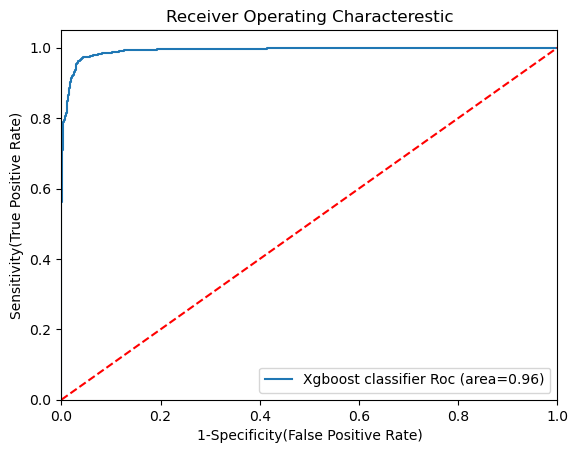

In [69]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# add the models to the list that you want to view on the ROC plot
auc_models=[
    {
        'label':'Xgboost classifier',
        'model':XGBClassifier(n_estimators= 300, max_depth= 30, learning_rate= 0.1, colsample_bytree= 1),
        'auc':0.9626
    },
]

## create loop through all model
for algo in auc_models:
    model=algo['model']## select the model
    model.fit(X_train,y_train)# train the model
    # Compute False positive rate, and True positive rate
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])
    ## calculate Area under the curve to display on the plot
    plt.plot(fpr,tpr,label='%s Roc (area=%0.2f)' % (algo['label'],algo['auc']))
##custom setting for plot
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characterestic')
plt.legend(loc='lower right')
plt.savefig("auc_Heart_Stroke.png")
plt.show()

In [75]:
# Save model and scaler
joblib.dump(model, "heart_stroke_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']